# Модуль 6. **Навчання без учителя**

In [1399]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

cmap = "tab10"
# cmap = "viridis"

### Завдання 1

###### У цьому завданні вам потрібно завантажити датасет https://drive.google.com/file/d/1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6/view?usp=share_link. 
###### Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

    Завантаження даних

In [1400]:
df_2d = pd.read_csv("data/data_2d.csv", header=None, names=['class', 'feature_1', 'feature_2'])
df_mnist = pd.read_csv("data/mnist.csv", header=None)

    Аналіз даних df_2d

In [1401]:
df_2d.head()

,class,feature_1,feature_2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [1402]:
df_2d.shape

(200, 3)

In [1403]:
df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      200 non-null    float64
 1   feature_1  200 non-null    float64
 2   feature_2  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [1404]:
df_2d.isnull().sum()

class        0
feature_1    0
feature_2    0
dtype: int64

In [1405]:
df_2d.describe()

,class,feature_1,feature_2
count,200.000000,200.000000,200.000000
mean,0.500000,1.758886,2.211502
std,0.501255,1.239986,1.605176
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.874456,0.955211
50%,0.500000,1.729753,2.282891
75%,1.000000,2.701499,3.602253
max,1.000000,4.554605,5.722027


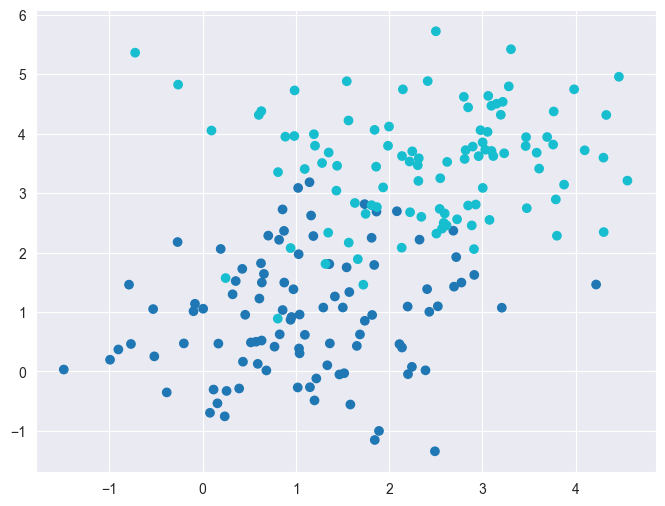

In [1406]:
plt.figure(figsize=(8, 6))
plt.scatter(
    x=df_2d.iloc[:, 1],
    y=df_2d.iloc[:, 2],
    c=df_2d.iloc[:, 0],
    edgecolor="face",
    cmap=cmap,
)
plt.show()

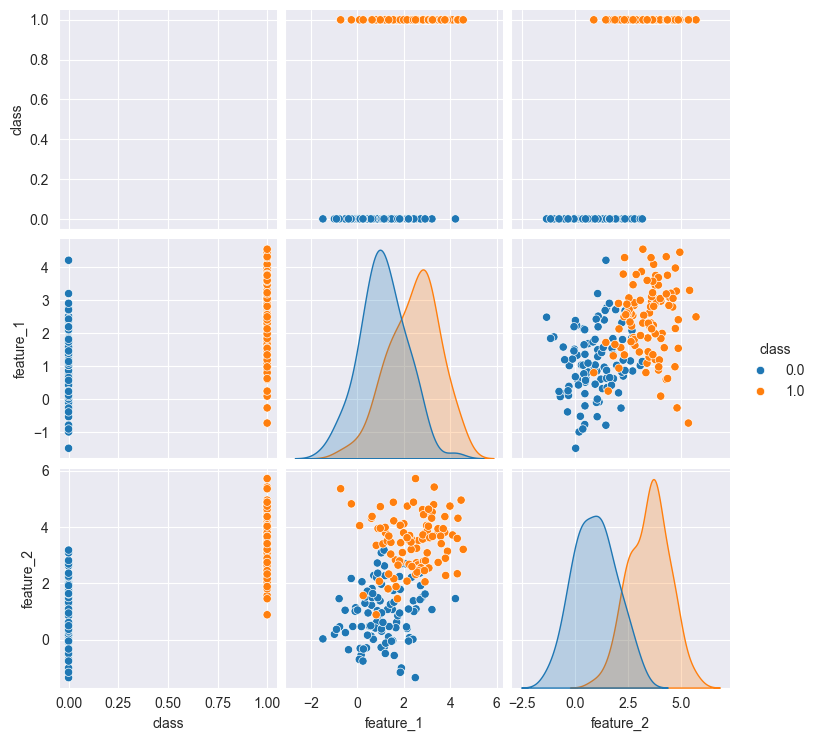

In [1407]:
sns.set_style("darkgrid")
features_to_analyse = ["class", "feature_1", "feature_2"]
sns.pairplot(df_2d, vars=features_to_analyse, hue="class")
plt.show()

    Аналіз даних df_mnist

In [1408]:
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1409]:
df_mnist.shape

(500, 785)

In [1410]:
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 3.0 MB


In [1411]:
df_mnist.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64

In [1412]:
df_mnist.describe() # ???

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,4.378000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.506000,0.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.873958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.314504,5.724334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


    функції


In [1413]:
def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions


def plot_elbow_method(distortions):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(distortions) + 1), distortions, marker="o", linestyle="--")
    plt.xlabel("Кількість кластерів")
    # plt.ylabel("Змінна внутрішня сума квадратів")
    plt.title("Метод ліктя")
    plt.show()


def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="Set1", alpha=0.8)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

    # Додавання легенди вручну
    legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.gca().add_artist(legend1)

    plt.show()


def plot_clusters_3d(data, labels, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    scatter = ax.scatter(
        data[:, 0], data[:, 1], data[:, 2], c=labels, cmap="Set1", s=50
    )

    ax.set_title(title)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")

    # Додавання легенди вручну
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    plt.show()

    визначення оптимальної кількості кластерів для df_2d

In [1414]:
from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

In [1415]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh, left=0.2, right=0.99)
    axs[0].set_title(f"{category} colormaps", fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect="auto", cmap=mpl.colormaps[name])
        ax.text(
            -0.01,
            0.5,
            name,
            va="center",
            ha="right",
            fontsize=10,
            transform=ax.transAxes,
        )

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

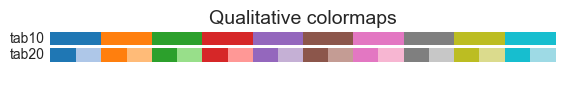

In [1418]:
plot_color_gradients(
    "Qualitative",
    [
        # "Pastel1",
        # "Pastel2",
        # "Paired",
        # "Accent",
        # "Dark2",
        # "Set1",
        # "Set2",
        # "Set3",
        "tab10",
        "tab20",
        # "tab20b",
        # "tab20c",
    ],
)

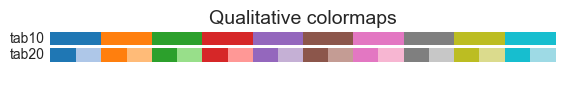

In [1420]:
plot_color_gradients(
    "Qualitative",
    [

        "tab10",
        "tab20",
    ],
)

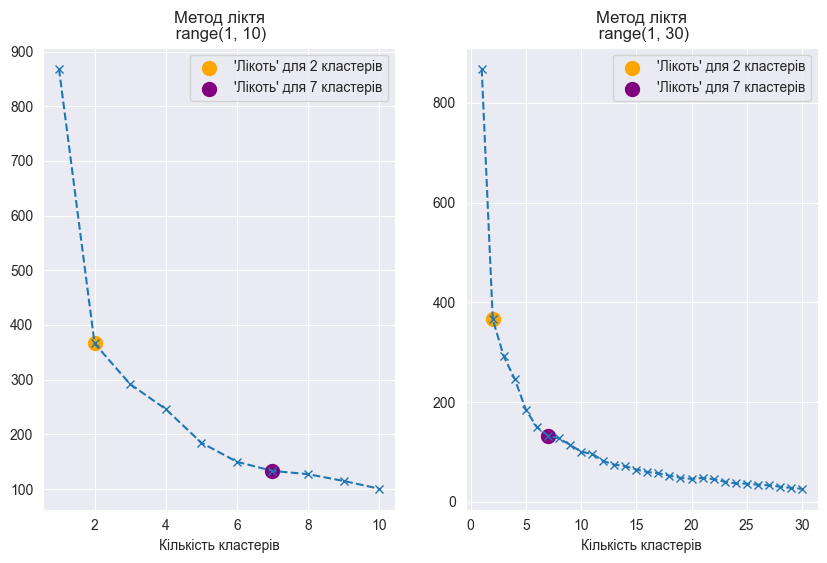

In [1432]:
def count_clusters(num):
    wcss = []
    for cluster in range(1, num + 1):
        kmeans = KMeans(n_clusters=cluster, n_init="auto", random_state=56)
        kmeans.fit(df_2d)
        wcss.append(kmeans.inertia_)
    return wcss


def plt_elbow_point(clusters, text, wcss):
    # color_point = "r" if text == "Wrong" else "g"
    color_point = [
        "black",
        "red",
        "orange",
        "yellow",
        "green",
        "cyan",
        "blue",
        "purple",
        "magenta",
    ]
    for cluster in clusters:
        plt.scatter(
            cluster,
            wcss[cluster - 1],
            c=color_point[cluster],
            edgecolors="face",
            linewidths=5,
            label=f"'Лікоть' для {cluster} кластерів",
        )


def plt_elbow_method(num):
    wcss = count_clusters(num)
    plt.plot(range(1, num + 1), wcss, marker="x", linestyle="--")
    plt_elbow_point([2, 7], "", wcss)
    # plt_elbow_point([0, 1, 2, 3, 4, 5, 6, 7, 8], "", wcss)
    plt.xlabel("Кількість кластерів")
    plt.title(f"Метод ліктя\n range(1, {num})")
    plt.grid(True)
    plt.legend()


plt.figure(figsize=(10, 6))

plt.subplot(121)
plt_elbow_method(10)

plt.subplot(122)
plt_elbow_method(30)

plt.show()

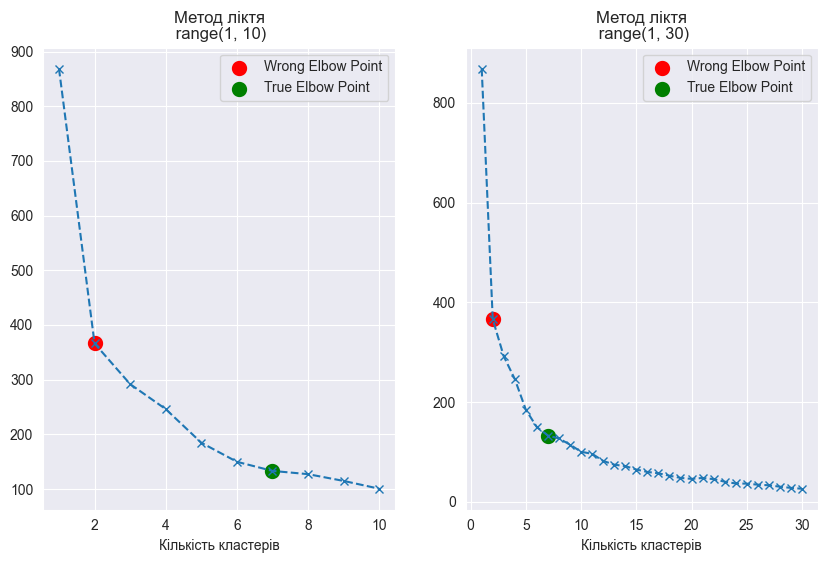

In [ ]:
def count_clusters(num):
    wcss = []
    for cluster in range(1, num + 1):
        kmeans = KMeans(n_clusters=cluster, n_init="auto", random_state=56)
        kmeans.fit(df_2d)
        wcss.append(kmeans.inertia_)
    return wcss

def plt_elbow_point(cluster, text, wcss):
    color_point = 'r' if text == "Wrong" else 'g'
    plt.scatter(
        cluster,
        wcss[cluster - 1],
        c=color_point,
        edgecolors="face",
        linewidths=5,
        label=f"{text} Elbow Point",
    )

def plt_elbow_method(num):
    wcss = count_clusters(num)
    plt.plot(range(1, num + 1), wcss, marker="x", linestyle="--")
    plt_elbow_point(2, "Wrong", wcss)
    plt_elbow_point(7, "True", wcss)

    plt.xlabel("Кількість кластерів")
    plt.title(f"Метод ліктя\n range(1, {num})")
    plt.grid(True)
    plt.legend()


plt.figure(figsize=(10, 6))

plt.subplot(121)
plt_elbow_method(10)

plt.subplot(122)
plt_elbow_method(30)

plt.show()

<div class="alert alert-block alert-info">
Виходячи з графіку, оптимальне число кластерів для df_2d - 7
</div>

In [ ]:
optimal_num_clusters = 7

### Завдання 2

###### Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

    кластеризація для датасету df_2d

In [ ]:
kmeans_df_2d = KMeans(
    n_clusters=optimal_num_clusters,
    n_init="auto",
    max_iter=300,
    init="k-means++",
    random_state=56,
)
kmeans_df_2d.fit(df_2d)

y_kmeans = kmeans_df_2d.fit_predict(df_2d)


labels_df_2d = kmeans_df_2d.labels_
centroids = kmeans_df_2d.cluster_centers_
colors = plt.cm.tab10(range(optimal_num_clusters))

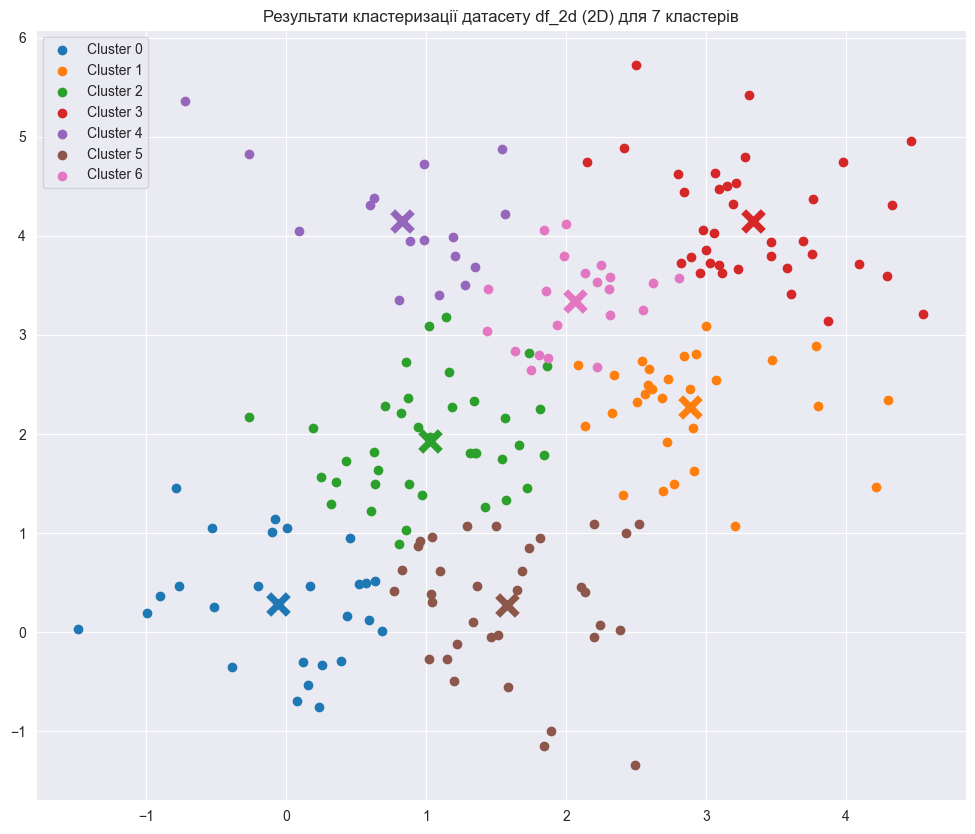

In [ ]:
fig = plt.figure(figsize=(12, 10))

for cluster_label in range(optimal_num_clusters):
    plt.scatter(
        df_2d[kmeans_df_2d.labels_ == cluster_label].iloc[:, 1],
        df_2d[kmeans_df_2d.labels_ == cluster_label].iloc[:, 2],
        label=f"Cluster {cluster_label}",
        c=[colors[cluster_label]],
        edgecolor="face",
    )


for i, centroid in enumerate(centroids):
    plt.scatter(
        centroid[1],
        centroid[2],
        c=[colors[i]],
        marker="x",
        linewidths=5,
        s=200,
    )

plt.title(
    f"Результати кластеризації датасету df_2d (2D) для {optimal_num_clusters} кластерів"
)
plt.legend()
plt.show()

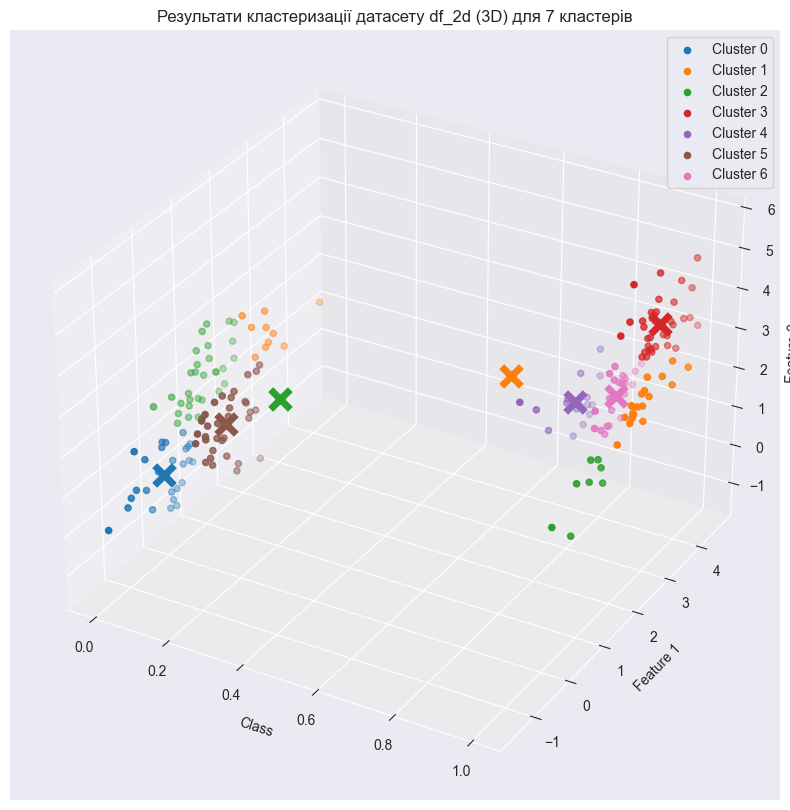

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

for cluster_label in range(optimal_num_clusters):
    ax.scatter(
        df_2d[kmeans_df_2d.labels_ == cluster_label].iloc[:, 0],
        df_2d[kmeans_df_2d.labels_ == cluster_label].iloc[:, 1],
        df_2d[kmeans_df_2d.labels_ == cluster_label].iloc[:, 2],
        label=f"Cluster {cluster_label}",
        c=[colors[cluster_label]],
        edgecolor="face",
    )

for i, centroid in enumerate(centroids):
    ax.scatter(
        centroid[0],
        centroid[1],
        centroid[2],
        c=[colors[i]],
        marker="x",
        linewidths=5,
        s=200,
    )

ax.set_xlabel("Class")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")
ax.set_title(
    f"Результати кластеризації датасету df_2d (3D) для {optimal_num_clusters} кластерів"
)
ax.legend()
plt.show()

    кластеризація для датасету df_mnist

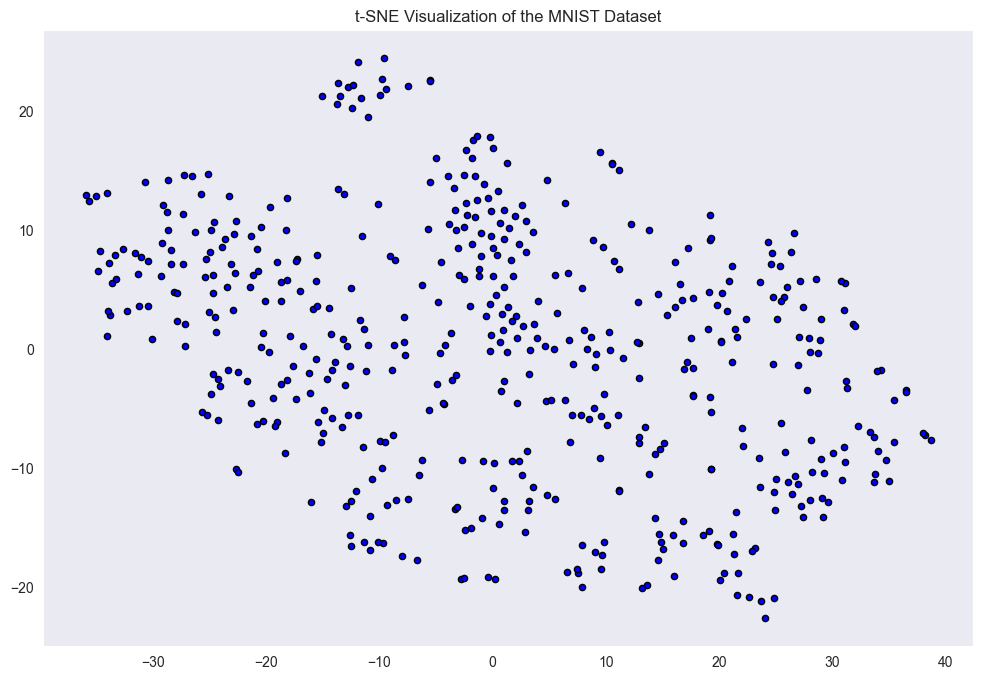

In [ ]:
# reduces the dimensionality of the MNIST dataset using PCA
# visualizes the data in a two-dimensional space using t-SNE

data_for_tsne_mnist = df_mnist.iloc[:, 0:]
# print(data_for_tsne_mnist)
pca_mnist = PCA(n_components=500)
pca_result_mnist = pca_mnist.fit_transform(data_for_tsne_mnist)

tsne_mnist = TSNE(n_components=2, random_state=0)
tsne_result_mnist = tsne_mnist.fit_transform(pca_result_mnist)
# print(tsne_result_mnist[:, 0])

plt.figure(figsize=(12, 8))
plt.grid()
plt.scatter(
    tsne_result_mnist[:, 0],
    tsne_result_mnist[:, 1],
    marker="o",
    s=20,
    c="b",
    # cmap="viridis",
    edgecolor="k",
)

plt.title("t-SNE Visualization of the MNIST Dataset")
plt.show()

    визначення оптимальної кількості кластерів для df_mnist

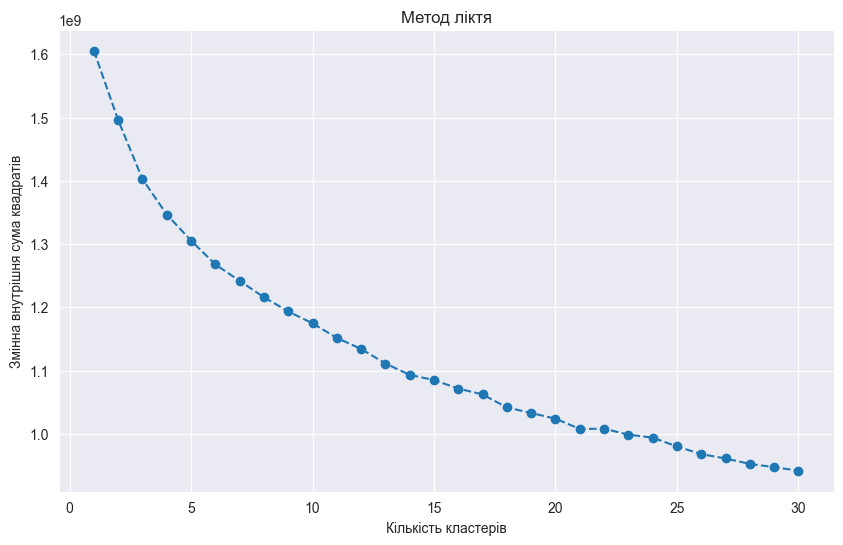

In [ ]:
#  кластеризація та оптимальна кількість кластерів для mnist
distortions_mnist_pca = find_optimal_clusters(df_mnist, 30)
plot_elbow_method(distortions_mnist_pca)